In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Create a transpose convolution instance

In [3]:
# Create a conv2d class instance with parameters

# Parameters
in_chans    = 3  # RGB
out_chans   = 15 # 15 feature maps
kernel_size = 5  # Odd number
stride      = 1
padding     = 0

# Create the instance
c = nn.ConvTranspose2d(in_channels=in_chans, out_channels=out_chans, kernel_size=kernel_size, stride=stride, padding=padding)

print(c), print('')

# Check out its weight tensor
print(f'Size of weight: {c.weight.shape}')
print(f'Size of bias:   {c.bias  .shape}')

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

Size of weight: torch.Size([3, 15, 5, 5])
Size of bias:   torch.Size([15])


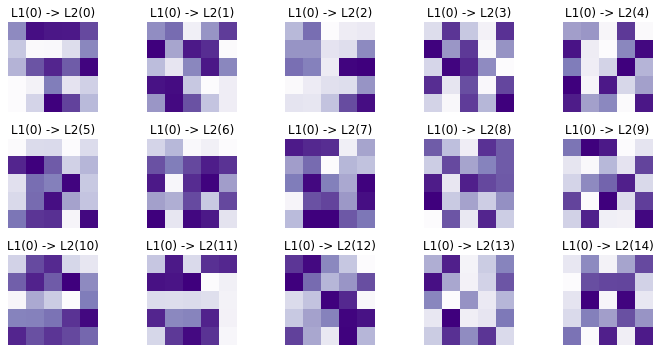

In [5]:
# What do these kernels look like?
fig, axs = plt.subplots(3, 5, figsize=(10, 5))

# Looking at 1st color channel 
for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[0, i, :, :]).detach(), cmap='Purples')
    ax.set_title(f'L1(0) -> L2({i})')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


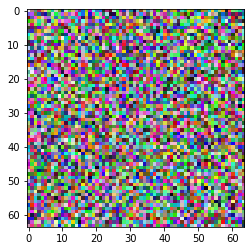

In [6]:
# Size of the image (N, RGB, width, height)
img_size = (1, 3, 64, 64)
img      = torch.rand(img_size)

# Pytorch wants channels first, but matplotlib wants channels last.
# Therefore, tensors must be permuted to visualize
img_2_view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img_2_view.shape)

plt.imshow(np.squeeze(img_2_view));

In [8]:
# Convolve the image with the filter bank (set of 'outChans' kernels)
conv_res = c(img)

print(img.shape)
print(conv_res.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


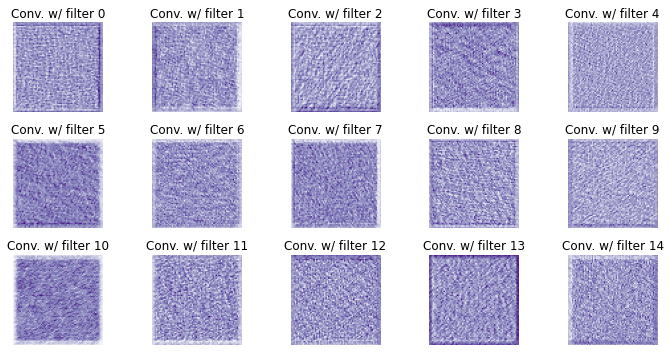

In [9]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)
fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):
    
    # Extract this "layer" of the convolution result
    I = torch.squeeze(conv_res[0, i, :, :]).detach()
    
    # And visualize it
    ax.imshow(I, cmap='Purples')
    ax.set_title(f'Conv. w/ filter {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()